##  Тарабонда Герман

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List, Tuple

### Пункт A

In [2]:
def lagrange_polynome_s(x_l: float, x_r: float, N: int) -> Tuple[List[float], List[float]]:
    xs = np.linspace(x_l, x_r, num=N).tolist()
    fs = [x * np.sin(2 * x) for x in xs]
    return (xs, fs)

def count_lagrange_s(xs: List[float], fs: List[float], x: float) -> float:
    res = 0.0
    for k, _ in enumerate(fs):
        prod = 1.0
        for i, _ in enumerate(xs):
            if i != k:
                prod *= (x - xs[i]) / (xs[k] - xs[i])
        res += fs[k] * prod
    return res

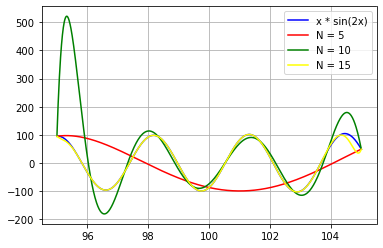

In [3]:
#plot graphics of interpolations
x0 = 100
X = np.linspace(x0 - 5, x0 + 5, 1000)
Y_func_a = [x * np.sin(2 * x) for x in X]
plt.plot(X, Y_func_a, color='blue', label='x * sin(2x)')
interpolations = [(5, 'red'), (10, 'green'), (15, 'yellow')]
for interpolation in interpolations:
    xs, fs = lagrange_polynome_s(x0 - 5, x0 + 5, interpolation[0])
    Y = [count_lagrange_s(xs, fs, x) for x in X]
    plt.plot(X, Y, color=interpolation[1], label=f'N = {interpolation[0]}')
plt.grid()
plt.legend()
plt.show()

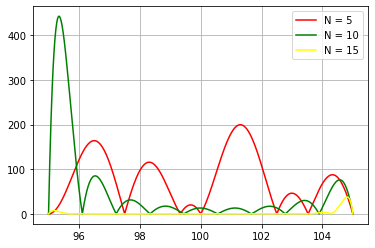

In [4]:
#plot graphics
for interpolation in interpolations:
    xs, fs = lagrange_polynome_s(x0 - 5, x0 + 5, interpolation[0])
    Y = [abs(count_lagrange_s(xs, fs, x) - x * np.sin(2 * x)) for x in X]
    plt.plot(X, Y, color=interpolation[1], label=f'N = {interpolation[0]}')
plt.grid()
plt.legend()
plt.show()

Можно заметить, что при увеличении $N$ модуль погрешности уменьшается, так как используется большее количество точек и соответственно функция интерполируется точнее

### Пункт B

In [5]:
def find_max_error_of_func_s(x_l: float, x_r: float, N: int) -> float:
    xs, fs = lagrange_polynome_s(x_l, x_r, N)
    X = np.linspace(x0 - 5, x0 + 5, 1000)
    F = [abs(count_lagrange_s(xs, fs, x) - x * np.sin(2 * x)) for x in X]
    return max(F)

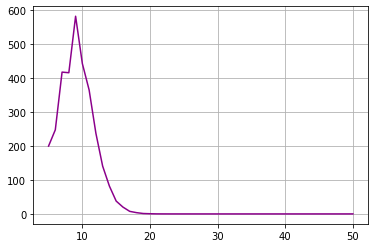

In [6]:
Ns = range(5, 51)
max_errors = [find_max_error_of_func_s(95, 105, N) for N in Ns]
plt.plot(Ns, max_errors, color='darkmagenta')
plt.grid()
plt.show()

Видно, что при увеличении числа точек максимальная погрешность стремительно падает приувеличение $N$. Но это происходит примерно полсе $N = 10$. Это довольно логично, так как количество точек с помощью которых мы инетрполируем функцию увеличивается, а следовательно максимальная погрешность уменьшается. Только при маленьких $N$ погрешность возрастала. Это могло происходить из-за того, что у нас только начало увеличиваться количесво точек и возмущения между точками возрастали

### Пункт С

In [7]:
def lagrange_polynome_chebyshev_s(N: int) -> Tuple[List[float], List[float]]:
    xs = [np.cos((np.pi * (2 * i + 1)) / (2 * N)) for i in range(N)]
    fs = [x * np.sin(2 * x) for x in xs]
    return (xs, fs)

def find_max_error_of_func_chebyshev_s(N: int) -> float:
    xs, fs = lagrange_polynome_chebyshev_s(N)
    X = np.linspace(-1, 1, 1000)
    F = [abs(count_lagrange_s(xs, fs, x) - x * np.sin(2 * x)) for x in X]
    return max(F)

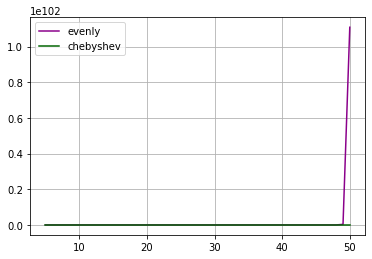

In [12]:
max_errors_s_2 = [find_max_error_of_func_s(-1, 1, N) for N in Ns]
plt.plot(Ns, max_errors_s_2, color='darkmagenta', label='evenly')
max_errors_chebyshev_s = [find_max_error_of_func_chebyshev_s(N) for N in Ns]
plt.plot(Ns, max_errors_chebyshev_s, color='darkgreen', label='chebyshev')
plt.grid()
plt.legend()
plt.show()

Как и предполагалось погрешность с использованием узлов Чебышева в разы лучше, чем с использованием равномерно распределенных узлов

### Пункт D

In [9]:
def 

SyntaxError: invalid syntax (<ipython-input-9-455680ca2399>, line 1)